In [21]:
import numpy as np
import matplotlib.pyplot as plt

A different way we can do this simulation is with the kinematic equation we have below

$z=v_{z}*t-\frac{1}{2}*g*t^{2}$

The initial velocity is considered a constant, so to get the first derivative of the equation would give the formula below.

$\frac{dz}{dt}=v_{z}-g*t$

We know that the initial z-position is 0, and the initial velocity is 10$\frac{m}{s}$, that g is a constant 9.8$\frac{m}{s^{2}}$.

Analytically, we know that the ball will be in the air for __2.041__ seconds, so we can increment t by __0.05__ seconds to see the trajectory over that time period.

This ode is different from the one we used in class because it only has 1 variable, but it uses the Runge-Kutta method of using the integral of what we are looking for to find the future values of the variable

### Runge-Kutta Method


In [22]:
def rg4(t, h, z):
    #Zero out the different k values used for correction
    k1 = 0
    k2 = 0
    k3 = 0
    k4 = 0
    
    #Begin assigning those values
    k1=h*f(t,z)
    k2=h*f(t+0.5*h,z+0.5*k1)
    k3=h*f(t+0.5*h,z+0.5*k2)
    k4=h*f(t+h,z+k3)

    #apply these corrections to the original y
    z+=1./6.*(k1+2*k2+2*k3+k4)
    return z

### Function Declaration & Initialization

In [32]:
def f(t, z):
    fv = 10-9.8*t #This is the derivative of the position equation
    return fv

#These are the boundary variables used to calculate the trajectory
t=0.01
tend = 2.05
h=0.01

#These variables will store the values
tp=[]
vz=[] #this is the position, but I named it vz because I'm working with the velocity

z = 10 #initial velocity

while(t<tend):
    #Check to see if the time has exceed the maximum, then we can just find an answer close enough
    if((t+h)>tend):
        h=tend-t
    z = rg4(t, h, z) #call the runge-kutta method
    #zh=np.append(zh, z[0]) #append the new height
    vz=np.append(vz, z)
    tp=np.append(tp, t) #save the time
    t=t+h #move up the time
    

### Graph

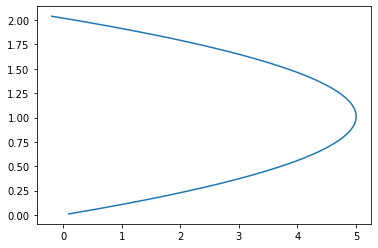

In [33]:
vz = [p - 10. for p in vz]
plt.plot(vz, tp)
plt.show()

### Forces Method

I'm going to use the forces that we used in class. The graviational force is the only force working on the ball. The formula for acceleration is the one below.

$ \frac{dv}{dt} = -\frac{GM}{r^2}$

In [47]:
def rg4(t, h, z, n):
    #Zero out the different k values used for correction
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    
    #Begin assigning those values
    k1=h*f(t,z)
    k2=h*f(t+0.5*h,z+0.5*k1)
    k3=h*f(t+0.5*h,z+0.5*k2)
    k4=h*f(t+h,z+k3)

    #apply these corrections to the original y
    z+=1./6.*(k1+2*k2+2*k3+k4)
    return z

In [48]:
#This is the function
def f(t, z):
    f = np.zeros(2)
    r = 6.3781e6 #this is the radius of the earth
    r += np.sqrt(z[0]**2) #as the ball is going up, you need to add to the current radius poition
   
    #------
    f[0] = z[1] #save the velocity
    f[1] = -G*M/r/r #find the next acceleration
    return f

#These are the value of the constants for the gravitation constant, and the mass of the earth
#I can't treat the earth as a point, so you need the actual constant values for this to work
G = 6.67408e-11
M = 5.972e24

#These are the boundary values fo rht eloop
t = 0.
tend = 2.05
h = 0.01

#This stores the values
tp =[]
zp = []

#z[0] -> position, z[1] -> velocity
z = [1., 10.]

while(t<tend):
    
    #check for the end of the conditional
    if((t + h) >= tend):
        h = tend - t
        
    #start the runge-kutta method
    z = rg4(t, h, z, 2)
    
    #save the values
    zp = np.append(zp, z[0])
    t+=h
    tp = np.append(tp, t)
    

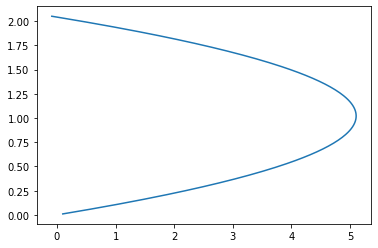

In [49]:
#This is the plot of the system
zp = [z - 1. for z in zp] #account that I started the position at 1 instead of 0 so I can do the intial division
plt.plot(zp, tp)
plt.show()